<a href="https://colab.research.google.com/github/manuel222-design/manuel222-design/blob/main/LogisticRegression_Ames_H.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this work, I am looking to perform a logistics regression on a portion of the commonly used Ames housing price data set.

In order to perform a logistic regression, the dependent variable needs to be discrete, therefore the first step is converting a continuous dependent variable (Sales Price) into a discrete, binary variable using a target value.
I want to examine the mean values of the independent variables with respect to the binary dependent variable, and determine if there is a statiscally significant difference using a t-test.
I would like to know what intercorrelation there is between my independent variables, and the correlation there is between the independents and dependent. This will influence what I use in the logistic regression model.
The suitable variables will be selected, split into train and test groups, and the train groups will be used to build the model. The model summary will be examined for vailidity
Finally, a confusion matrix will be used to visualise how well the test data fits the training data model.

In [16]:
import pandas as pd # import pandas package to read in data
import numpy as np # import numpy for
import scipy.stats as stats # importing stats module to set up A-B aka t-test test
from sklearn.model_selection import train_test_split # import sklearn module to split the data into training and testing sets
import statsmodels.api as sm # import statsmodels.api module as sm
import seaborn as sns # import seaborn and matplotlib to visualise the correlation matrix
import matplotlib.pyplot as plt
import sklearn.metrics as metrics # import metrics to crease the confusion metrix

In [17]:
 # read in the csv from the file location
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
ames = pd.read_csv('/content/AmesHousing.csv')

In [18]:
# Convert the continuous dependent varaible into a discrete, binary variable
# Creates new column, called target value, which is true when equal or greater then 200,000
ames['target value'] = (ames['SalePrice'] >= 200000)
ames.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,target value
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,NaN,NaN,NaN,0,5,2010,WD,Normal,215000,True
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000,False
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000,False
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,NaN,NaN,NaN,0,4,2010,WD,Normal,244000,True
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900,False


In [19]:
# calculate the means of the independent variables, grouping by the new discrete dependent variable
ames.groupby('target value').mean(numeric_only=True)

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
target value,,,,,,,,,,,,,,,,,,,,,
False,1475.447420,7.291469e+08,59.632425,64.89011,9033.030185,5.483934,5.658715,1961.863681,1977.890944,59.739003,...,72.592016,34.408471,27.277507,2.130477,13.834956,1.281889,60.424051,6.149951,2007.803797,140245.305745
True,1442.175799,6.800379e+08,52.123288,79.76512,12762.062785,7.527397,5.339041,1993.614155,1999.215753,202.076655,...,143.366438,78.308219,13.009132,3.675799,21.083333,4.497717,27.682648,6.371005,2007.759132,275877.394977


For each independent variable, we want to run an A-B test to determine if there is a statiscically significant difference. The null hyposthesis is both values are statiscally not different, with a p=<0.05 determing we must reject the null hypothesis

In [20]:
# Split data, using the discreet dependent varaible 'target value'
group1 = ames[ames['target value'] == True]
group2 = ames[ames['target value'] == False]

# run t-test on independent variables
print('Lot Area ', stats.ttest_ind(group1['Lot Area'], group2['Lot Area']))
print('Overall Qual ', stats.ttest_ind(group1['Overall Qual'], group2['Overall Qual']))
print('Overall Cond ', stats.ttest_ind(group1['Overall Cond'], group2['Overall Cond']))
print('Gr Liv Area ', stats.ttest_ind(group1['Gr Liv Area'], group2['Gr Liv Area']))
print('TotRms AbvGrd ', stats.ttest_ind(group1['TotRms AbvGrd'], group2['TotRms AbvGrd']))
print('Yr Sold ', stats.ttest_ind(group1['Yr Sold'], group2['Yr Sold']))

Lot Area  TtestResult(statistic=np.float64(12.010357773110666), pvalue=np.float64(1.793734747012678e-32), df=np.float64(2928.0))
Overall Qual  TtestResult(statistic=np.float64(47.93751919037016), pvalue=np.float64(0.0), df=np.float64(2928.0))
Overall Cond  TtestResult(statistic=np.float64(-7.188296925907744), pvalue=np.float64(8.290017633689768e-13), df=np.float64(2928.0))
Gr Liv Area  TtestResult(statistic=np.float64(38.928767514080974), pvalue=np.float64(1.5834591903793514e-267), df=np.float64(2928.0))
TotRms AbvGrd  TtestResult(statistic=np.float64(23.619140019112713), pvalue=np.float64(4.823274671819433e-113), df=np.float64(2928.0))
Yr Sold  TtestResult(statistic=np.float64(-0.840632949411603), pvalue=np.float64(0.4006222345273083), df=np.float64(2928.0))


All independent variables, with the exception of Yr sold, give a probability value of less than 0.05, meaning we must reject the null hypothesis. Therefore, we can say that 5/6 of the independent variables are statistically different, when the sales price is hitting or missing the target value.

Now I will look for correlation between variables using a correlation matrix, and plot using seaborn

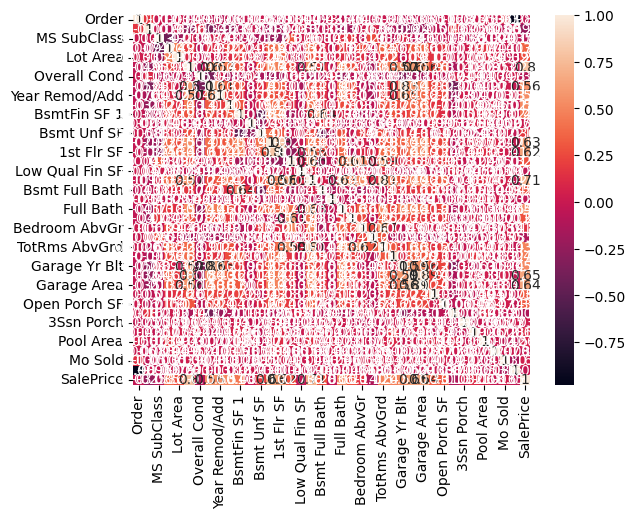

In [21]:
matrix = ames.select_dtypes(include=np.number).corr() # create a correlation matrix to visualise the variable correlation
sns.heatmap(matrix,annot=True)
plt.show()

Ideally, we want our independant varibales to have low intercorrelations (< 0.1), and our independent-dependent correlations to be highly correlated (> 0.3). Therefore, we will choose Lot Area and Overall Qual as our independent variables moving forward

In [22]:
ames = ames[['Lot Area', 'Overall Qual', 'target value']] # Select only relevant columns
ames.head()

,Lot Area,Overall Qual,target value
0,31770,6,True
1,11622,5,False
2,14267,6,False
3,11160,7,True
4,13830,5,False


Now we have the data in a suitable state, I need to build the model using training data, then evaluate it using a test dataset.

In [23]:
train_data, test_data = train_test_split(ames) # Split the data into training and testing data sets
train_data.head()

,Lot Area,Overall Qual,target value
2433,9171,7,True
1668,8294,4,False
1224,9600,6,False
117,9600,5,False
2318,13128,8,True


In [24]:
# assign the independent and dependent variables
dependent = train_data['target value']
independent = train_data[['Lot Area','Overall Qual']]
independent = sm.add_constant(independent) # add a constant to the independent variable, in order to improve fitting

model = sm.Logit(dependent,independent).fit() # Building the logistic model
model.summary()

Optimization terminated successfully.
         Current function value: 0.287660
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           target value   No. Observations:                 2197
Model:                          Logit   Df Residuals:                     2194
Method:                           MLE   Df Model:                            2
Date:                Wed, 21 May 2025   Pseudo R-squ.:                  0.5242
Time:                        07:17:49   Log-Likelihood:                -631.99
converged:                       True   LL-Null:                       -1328.1
Covariance Type:            nonrobust   LLR p-value:                4.604e-303
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -15.9211      0.692    -23.007      0.000     -17.277     -14.565
Lot Area         0.0002   1.58e-05     11.173      0.000       0.000       0.000
Overall Qual     2.0315      0.092     22.061      0.000       1.851       2.212
================================================================================
"""

The pseudo R-squ. value is essentially the same as R^2 we use in linear regressions, aka. a measure of how much of the dependent variables varience is accounted for by the indpendent variables. A value of 51.1% is acceptible for a complex real world system.

We can test how well the model performed by using a confusion matrix on the test data

In [25]:
test_actual = test_data['target value'] # assign the test dependent variable
test_independent = test_data[['Lot Area','Overall Qual']]  # assign the test independent variable
test_independent = sm.add_constant(test_independent) # add a constand to the independent variable to imnprove fitting

test_predicted = model.predict(test_independent) >= 0.5 # predict using independent variables when dependent = true
test_predicted.head()

,0
2123,False
1115,True
1486,False
92,True
831,False


<Axes: >

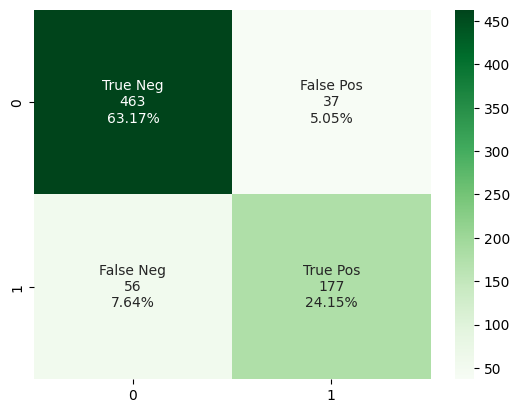

In [26]:
# Use seaborn to better visualise the confusion matrix, to better determine the model accuracy
ConfMatrix = metrics.confusion_matrix(test_actual, test_predicted)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in ConfMatrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in ConfMatrix.flatten()/np.sum(ConfMatrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(ConfMatrix, annot=labels, fmt='', cmap='Greens')